Room Occupancy Detection using GBC model 

Confusion Matrix:
 [[17979    21]
 [11961    39]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     18000
         1.0       0.65      0.00      0.01     12000

    accuracy                           0.60     30000
   macro avg       0.63      0.50      0.38     30000
weighted avg       0.62      0.60      0.45     30000



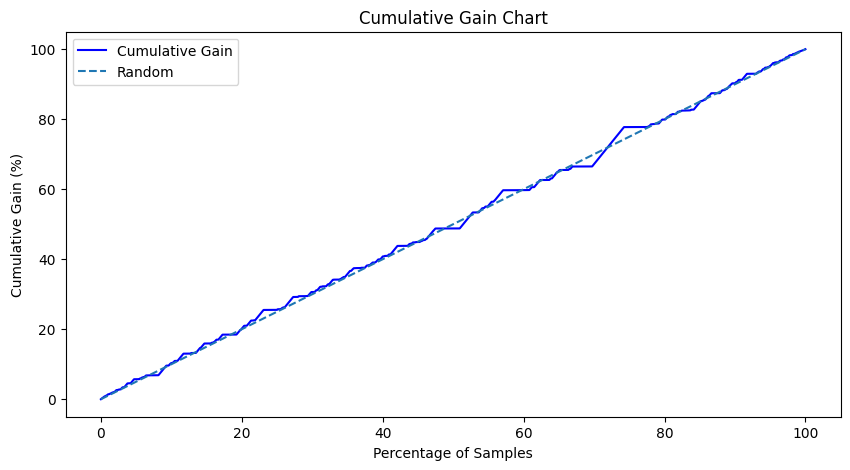

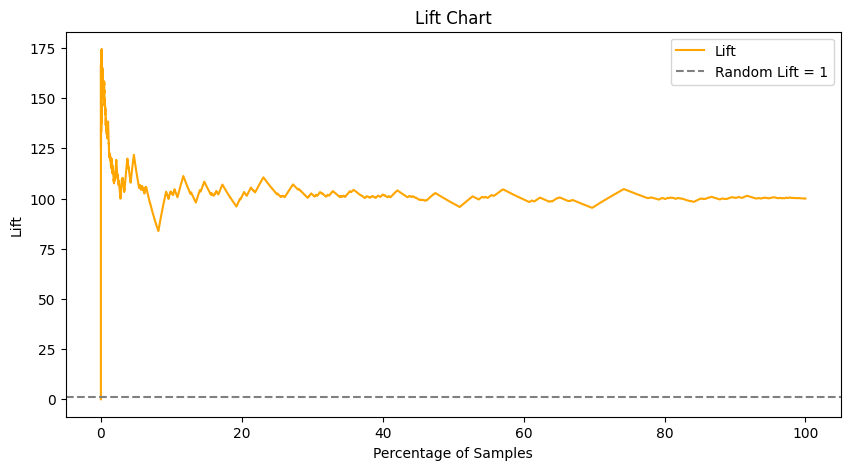

In [8]:
import numpy as np
import pandas as pd
import os
from joblib import load
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the GBC model and scaler
gbc_folder = "C:/Users/madhu/Desktop/individual_project/outputs/output_train/GBC_output_model"
gbc_model_path = os.path.join(gbc_folder, 'gbc_model_human_detection.joblib')
scaler_path = os.path.join(gbc_folder, 'scaler_gbc_human_detection.joblib')

# Load the trained GBC model and scaler
gbc_model = load(gbc_model_path)
scaler = load(scaler_path)

# Paths to the combined data and labels
data_folder = "C:/Users/madhu/Desktop/individual_project/outputs/output_train/label_output_training_data" 
combined_data_path = os.path.join(data_folder, 'combined_fft_data.npy')
labels_path = os.path.join(data_folder, 'combined_labels.npy')

# Load the combined feature data and labels
X_combined = np.load(combined_data_path)
y = np.load(labels_path)

# Scale the combined data
X_combined_scaled = scaler.transform(X_combined)

# Use the GBC model to get predictions and probabilities
gbc_predictions = gbc_model.predict(X_combined_scaled)  # Get predictions (0 or 1)
gbc_probabilities = gbc_model.predict_proba(X_combined_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate the confusion matrix and classification report
cm = confusion_matrix(y, gbc_predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y, gbc_predictions))


# 3. Cumulative Gain and Lift Charts
def plot_cumulative_gain(y_true, y_scores):
    """Plot cumulative gain and lift charts."""
    # Sort the data by scores
    data = pd.DataFrame({'y_true': y_true, 'y_scores': y_scores})
    data = data.sort_values('y_scores', ascending=False)
    
    # Calculate cumulative gains
    total_positives = data['y_true'].sum()
    data['cumulative_gain'] = (data['y_true'].cumsum() / total_positives) * 100
    data['percentage'] = np.arange(1, len(data) + 1) / len(data) * 100

    # Plot cumulative gain
    plt.figure(figsize=(10, 5))
    plt.plot(data['percentage'], data['cumulative_gain'], label='Cumulative Gain', color='blue')
    plt.plot([0, 100], [0, 100], linestyle='--', label='Random')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Cumulative Gain (%)')
    plt.title('Cumulative Gain Chart')
    plt.legend()
    plt.show()

    # Calculate lift
    data['lift'] = data['cumulative_gain'] / (data['percentage'] / 100)
    
    # Plot lift chart
    plt.figure(figsize=(10, 5))
    plt.plot(data['percentage'], data['lift'], label='Lift', color='orange')
    plt.axhline(y=1, color='gray', linestyle='--', label='Random Lift = 1')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.show()

# Plot cumulative gain and lift charts
plot_cumulative_gain(y, gbc_probabilities)



Room Occupancy Detection using KNN model

Confusion Matrix:
 [[14858  3142]
 [ 9414  2586]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.83      0.70     18000
         1.0       0.45      0.22      0.29     12000

    accuracy                           0.58     30000
   macro avg       0.53      0.52      0.50     30000
weighted avg       0.55      0.58      0.54     30000



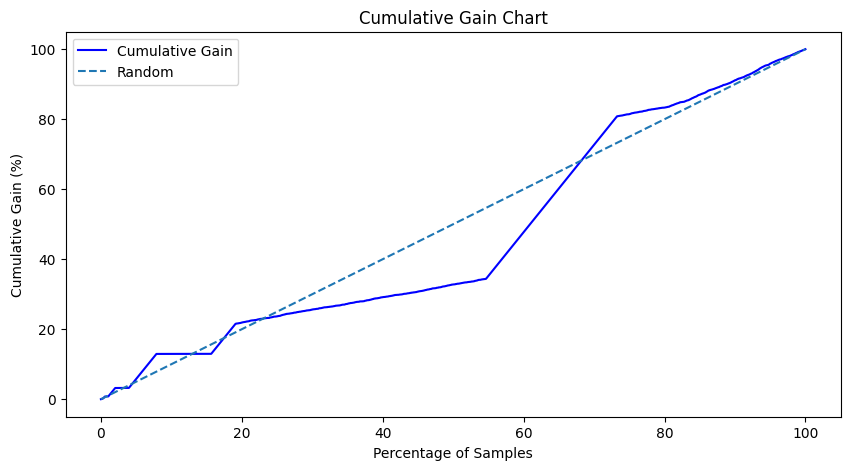

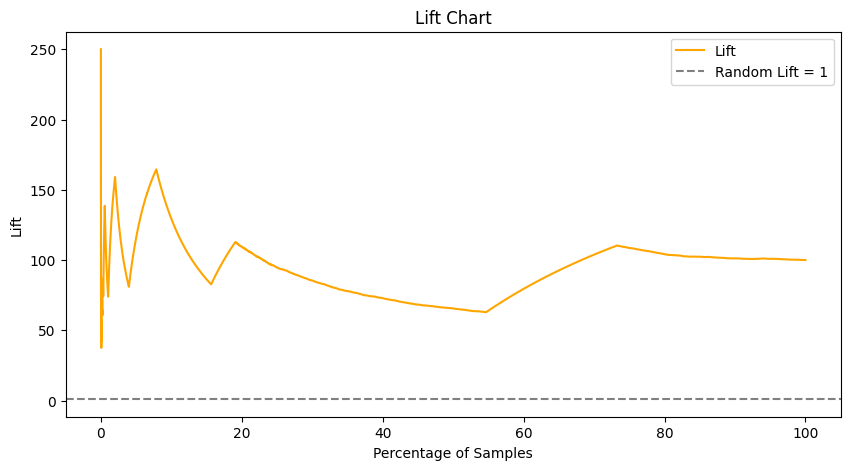

In [9]:
import numpy as np
import pandas as pd
import os
from joblib import load
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the GBC model and scaler
gbc_folder = "C:/Users/madhu/Desktop/individual_project/outputs/output_train/KNN_model_output"
gbc_model_path = os.path.join(gbc_folder, 'knn_model_human_detection.joblib')
scaler_path = os.path.join(gbc_folder, 'scaler_knn_human_detection.joblib')

# Load the trained GBC model and scaler
gbc_model = load(gbc_model_path)
scaler = load(scaler_path)

# Paths to the combined data and labels
data_folder = "C:/Users/madhu/Desktop/individual_project/outputs/output_train/label_output_training_data" 
combined_data_path = os.path.join(data_folder, 'combined_fft_data.npy')
labels_path = os.path.join(data_folder, 'combined_labels.npy')

# Load the combined feature data and labels
X_combined = np.load(combined_data_path)
y = np.load(labels_path)

# Scale the combined data
X_combined_scaled = scaler.transform(X_combined)

# Use the GBC model to get predictions and probabilities
gbc_predictions = gbc_model.predict(X_combined_scaled)  # Get predictions (0 or 1)
gbc_probabilities = gbc_model.predict_proba(X_combined_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate the confusion matrix and classification report
cm = confusion_matrix(y, gbc_predictions)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y, gbc_predictions))


# 3. Cumulative Gain and Lift Charts
def plot_cumulative_gain(y_true, y_scores):
    """Plot cumulative gain and lift charts."""
    # Sort the data by scores
    data = pd.DataFrame({'y_true': y_true, 'y_scores': y_scores})
    data = data.sort_values('y_scores', ascending=False)
    
    # Calculate cumulative gains
    total_positives = data['y_true'].sum()
    data['cumulative_gain'] = (data['y_true'].cumsum() / total_positives) * 100
    data['percentage'] = np.arange(1, len(data) + 1) / len(data) * 100

    # Plot cumulative gain
    plt.figure(figsize=(10, 5))
    plt.plot(data['percentage'], data['cumulative_gain'], label='Cumulative Gain', color='blue')
    plt.plot([0, 100], [0, 100], linestyle='--', label='Random')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Cumulative Gain (%)')
    plt.title('Cumulative Gain Chart')
    plt.legend()
    plt.show()

    # Calculate lift
    data['lift'] = data['cumulative_gain'] / (data['percentage'] / 100)
    
    # Plot lift chart
    plt.figure(figsize=(10, 5))
    plt.plot(data['percentage'], data['lift'], label='Lift', color='orange')
    plt.axhline(y=1, color='gray', linestyle='--', label='Random Lift = 1')
    plt.xlabel('Percentage of Samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.show()

# Plot cumulative gain and lift charts
plot_cumulative_gain(y, gbc_probabilities)

